<a href="https://colab.research.google.com/github/valeriarodriguezm/Sales_Forecasting/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nicolasmontano/BMAN60422-Coursework-Project-.git data
%cd data

Cloning into 'data'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 23 (delta 4), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (23/23), done.
/content/data


#Libraries


In [ ]:
import zipfile
import os
from os.path import  isfile, join
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

#Plot
import seaborn as sns

#Load Data

In [ ]:
directory='./'
onlyfiles=[f for f in os.listdir(directory) if isfile(join(directory,f))]

for o in onlyfiles:
  print(o)
  if o.endswith('.zip'):
    zip=zipfile.ZipFile(join(directory,o),'r')
    zip.extractall(directory)
    zip.close()
    os.remove(join(directory,o))

Train.zip
train_2.zip
DA2021_train.zip
train_3.csv
DA2021_store.csv
README.md
train.zip
DA2021_test.csv


In [ ]:
#Load Train and stores data
train=pd.read_csv('train_2.csv')
train['Date']=pd.to_datetime(train['Date'],format='%Y-%m-%d')
rows=train.shape[0]
train['StateHoliday'].replace(0,'0', inplace = True) 
train[:2]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,competitive_since,Promo2_date,days_competitve,days_promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,NaN,2524.0,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2007-11-01,2010-03-22,2829.0,1957.0


#Data feauturing


In [ ]:
int1=[1,2,3,1,2,3,1,2,3,1,2,3,3,1,2,3,1,2,3,1,2,3,1,2,2,3,1,2,3,1,2,3,1,2,3,1]

In [ ]:
#New variable for interval
train['day']=train['Date'].dt.day
train['month']=train['Date'].dt.month
train['year']=train['Date'].dt.year

#interval variable
table_interval=pd.DataFrame(columns=['month','interval_month'])
intervals=['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']
count2=0
for interval in intervals:
  aux_table=pd.DataFrame(columns=['month','interval_month'])
  count=1

  for i in range(12):
    #print(i)  
    aux_table.loc[i,'month']=i+1
    #aux_table.loc[i,'interval_month']=count

  aux_table['interval']=interval
  table_interval=table_interval.append(aux_table,ignore_index=True)
table_interval['interval_month']=int1

In [ ]:
train=pd.merge(train, table_interval,how='left', left_on=['month','PromoInterval'], right_on=['month','interval'])
train.drop(labels=['interval'],axis=1,inplace=True)
train.shape[0]-rows

0

#EDA

##Temporal behaviour

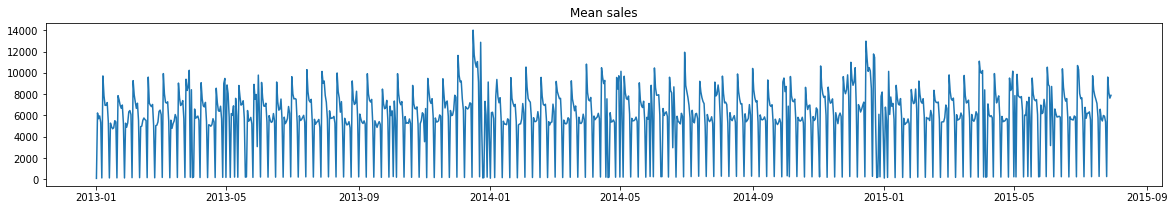

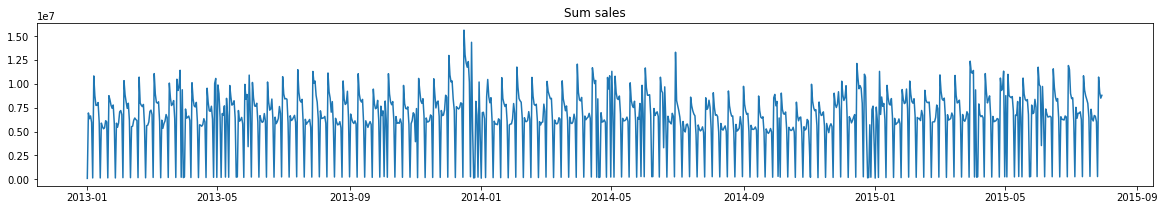

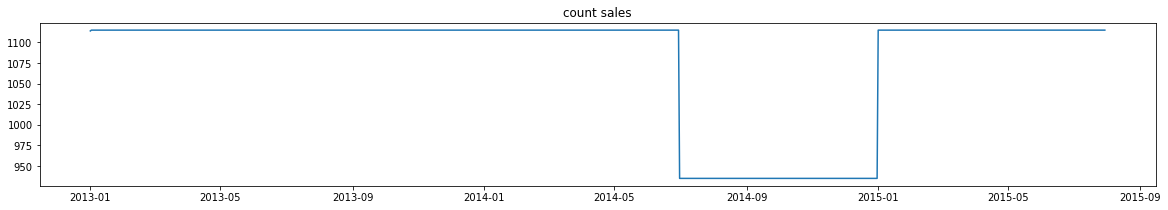

In [ ]:
f_obs=0
l_obs=-1
dates=train.groupby(['Date'])['Sales'].agg(['count','sum','mean'])

plt.subplots(figsize=(20,3))
plt.title('Mean sales')
plt.plot(dates['mean'][f_obs:l_obs])
plt.show()
print('\n')
plt.subplots(figsize=(20,3))
plt.title('Sum sales')
plt.plot(dates['sum'][f_obs:l_obs])
plt.show()
print('\n')
plt.subplots(figsize=(20,3))
plt.title('count sales')
plt.plot(dates['count'][f_obs:l_obs])
plt.show()


In [ ]:
count_by_date=train.groupby(['Date'])['Sales'].agg(['count','mean']).reset_index().sort_values(by='count',ascending=True) 
print('min data {}, max data {}'.format(count_by_date[count_by_date['count']==935]['Date'].min(),count_by_date[count_by_date['count']==935]['Date'].max()))

min data 2014-07-01 00:00:00, max data 2014-12-31 00:00:00


In [ ]:
set_1=set(train[(train['Date']>='2014-07-01') & (train['Date']<='2014-12-31')]['Store'])
set_2=set(train[(train['Date']=='2015-07-01')]['Store'])
stores_not_range=set_2-set_1
print('No info of stores: {}'.format(len(stores_not_range)))

No info of stores: 180


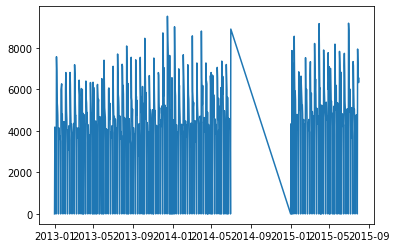

In [ ]:
data=train[train['Store']==941].loc[:,['Date','Sales']]
plt.plot(data['Date'],data['Sales'])

##Descriptive analysis

In [ ]:

#Train only open
train=train[train['Open']==1]
rows=train.shape[0]

print("\nDescription\n{}".format("-"*35))
print("Shape of train:{}\n".format(train.shape))
print("Column types:\n\n{}".format(train.dtypes))

print("\nMissing Value Summary\n{}".format("-"*35))
print("Train\n{}".format("-"*10))
nulls=pd.DataFrame(train.isnull().sum())
nulls['count']=train['Sales'].count()
nulls.columns=['nulls','count']
nulls['percentage']=nulls['nulls']/nulls['count']
print(nulls[nulls['nulls']>0])

## Duplicates
print("\nCleaning Summary\n{}".format("-"*35))
duplicate_rows = train.loc[:,['Store','Date']].duplicated()

if True in duplicate_rows:
    train = train[~duplicate_rows]
print("Removed {} duplicate rows".format(np.where(duplicate_rows==True)[0].size))

#Descriptive analysis
print("\nDecriptive statistics\n{}".format("-"*35))
stats=train.describe(include='all',datetime_is_numeric=True,).T
stats


Description
-----------------------------------
Shape of train:(844392, 26)

Column types:

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
competitive_since                    object
Promo2_date                          object
days_competitve            

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Store,844392,NaN,NaN,NaN,558.423,1,280,558,837,1115,321.732
DayOfWeek,844392,NaN,NaN,NaN,3.52036,1,2,3,5,7,1.72369
Date,844392,NaN,NaN,NaN,2014-04-11 01:02:42.487317504,2013-01-01 00:00:00,2013-08-16 00:00:00,2014-03-31 00:00:00,2014-12-10 00:00:00,2015-07-31 00:00:00,NaN
Sales,844392,NaN,NaN,NaN,6955.51,0,4859,6369,8360,41551,3104.21
Customers,844392,NaN,NaN,NaN,762.728,0,519,676,893,7388,401.228
Open,844392,NaN,NaN,NaN,1,1,1,1,1,1,0
Promo,844392,NaN,NaN,NaN,0.446352,0,0,0,1,1,0.497114
StateHoliday,844392,4,0,843482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,844392,NaN,NaN,NaN,0.19358,0,0,0,0,1,0.395103
StoreType,844392,4,a,457077,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#null values handling
competion_median=train['CompetitionDistance'].median()
train['CompetitionDistance'].fillna(competion_median,inplace=True)

#more nulls REMEMEBER TO CHANGE IT
train['days_competitve'].fillna(0,inplace=True)
train['days_promo2'].fillna(0,inplace=True)

#remove open==1
train=train[train['Open']==1]

In [ ]:
numeric=['Sales','Customers','CompetitionDistance', 'days_competitve','days_promo2']
categorical=['DayOfWeek','Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment','Promo2','PromoInterval','day','month','interval_month']
             

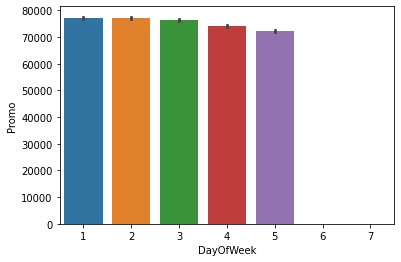

In [ ]:

sns.barplot(x='DayOfWeek',y='Promo',data=train,estimator=np.sum)

sns.countplot('Customers',hue='DayOfWeek', data=train)

##Univarite

###Numerical

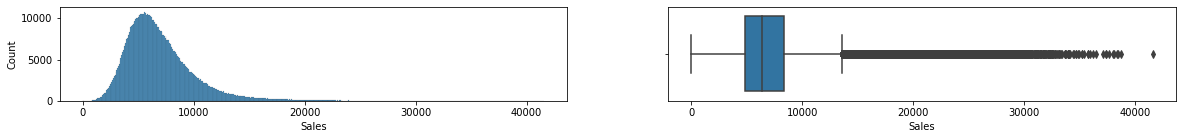

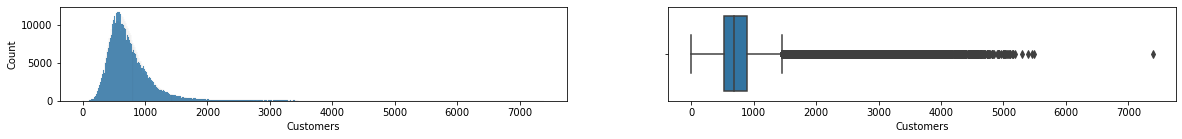

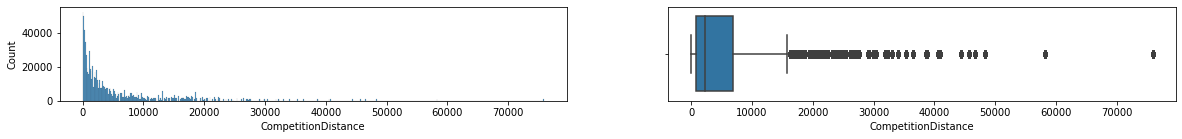

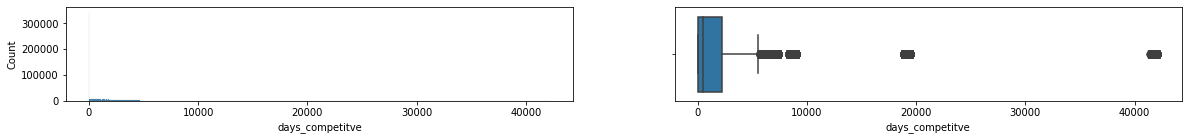

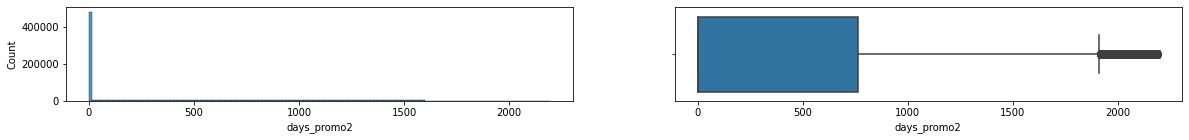

In [ ]:
numeric_len=len(numeric)
counter=1

for i,num in enumerate(numeric):
  plt.subplots(figsize=(20,10))
 
  for j in range(2):
    #plt.title(num)    
    if j==0:
      plt.subplot(numeric_len, 2 ,counter)
      sns.histplot(train[num])
    else:
      plt.subplot(numeric_len, 2 ,counter)
      sns.boxplot(x=train[num])
    counter+=1

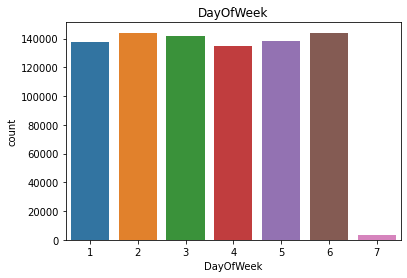

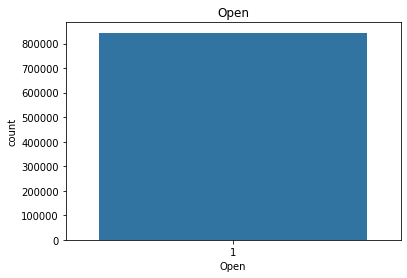

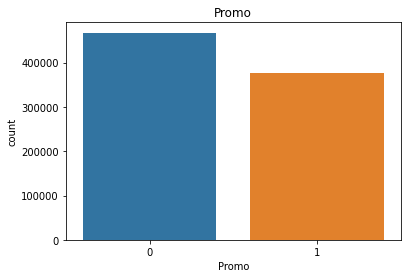

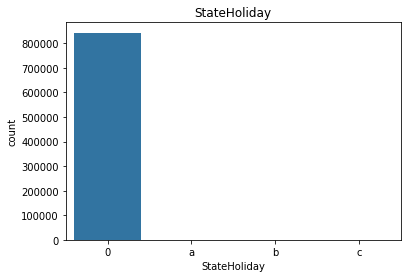

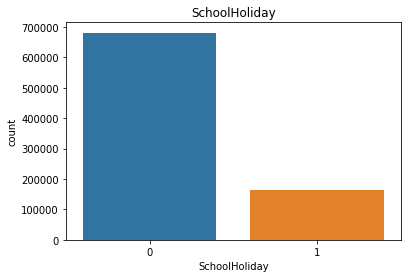

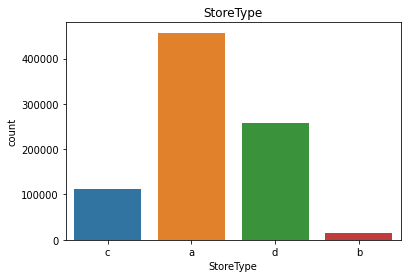

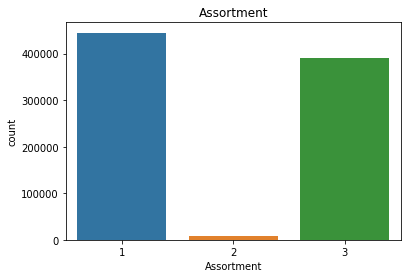

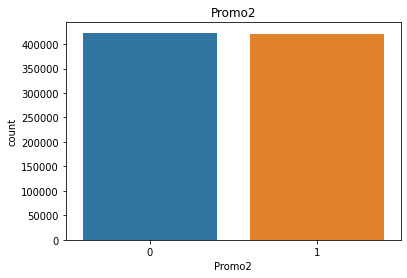

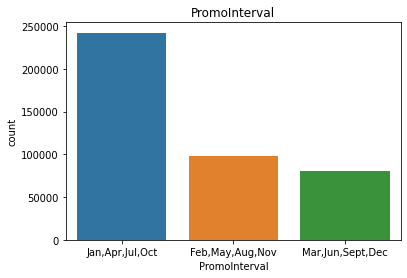

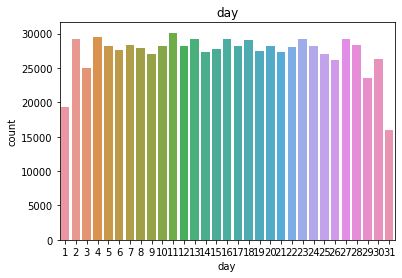

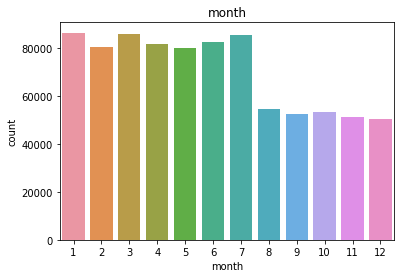

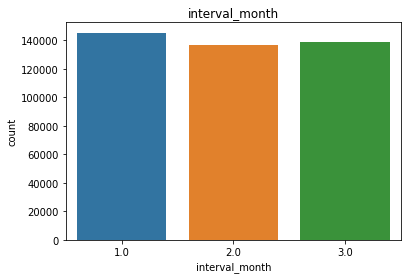

In [ ]:
categorical_len=len(categorical)
counter=1
#plt.subplots(figsize=(10,50))
for i,num in enumerate(categorical):
  sns.countplot(x=train[num])
  plt.title(num)
  counter+=1
  plt.show()
  

#Bivariate

Sales


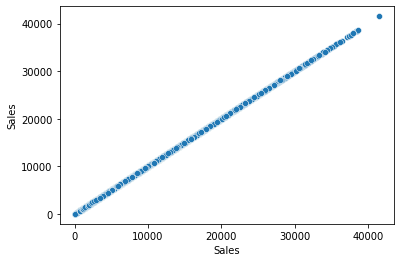

Customers


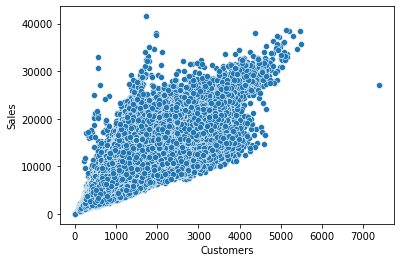

CompetitionDistance


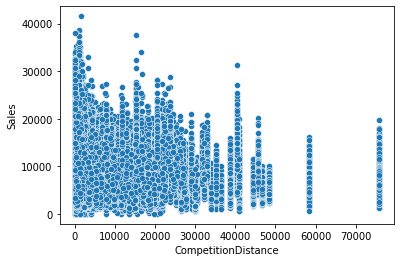

days_competitve


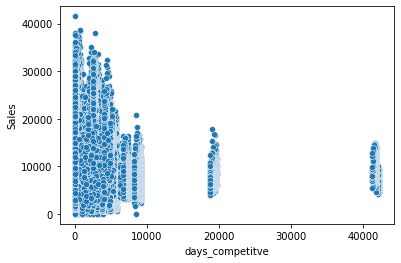

days_promo2


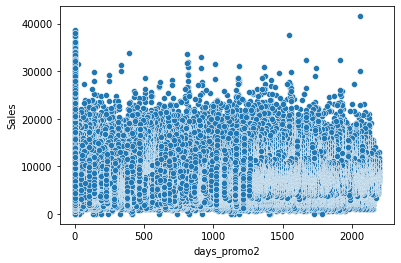

In [ ]:
for i in numeric:
  print(i)
  sns.scatterplot(x=i,y='Sales',data=train)
  plt.show()

DayOfWeek


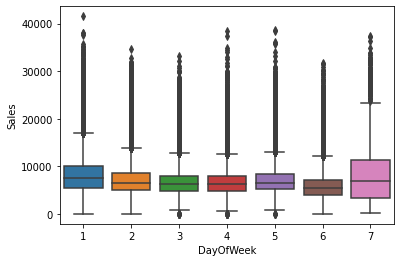

Open


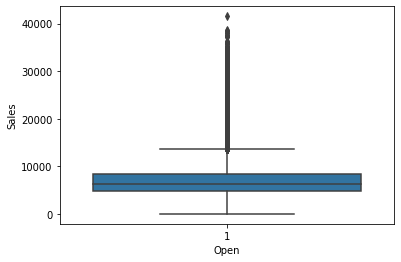

Promo


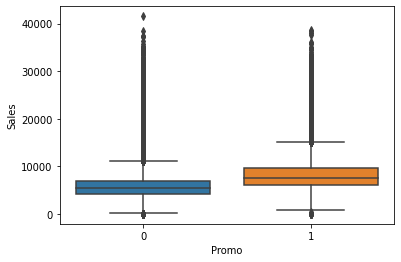

StateHoliday


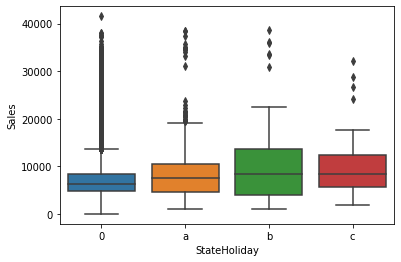

SchoolHoliday


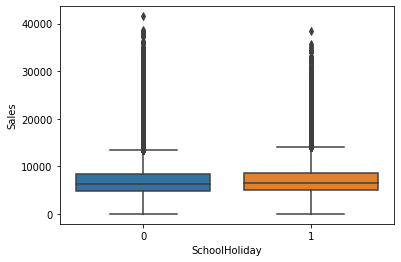

StoreType


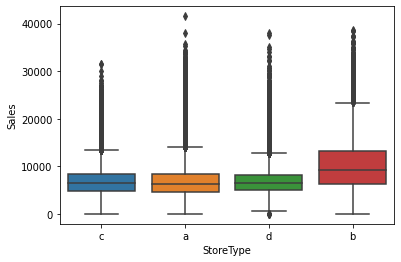

Assortment


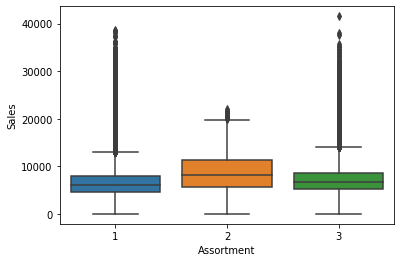

Promo2


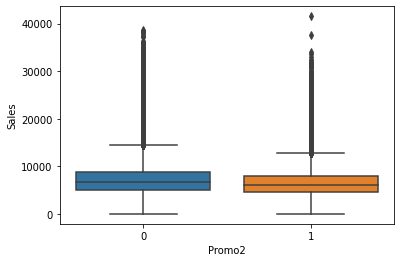

PromoInterval


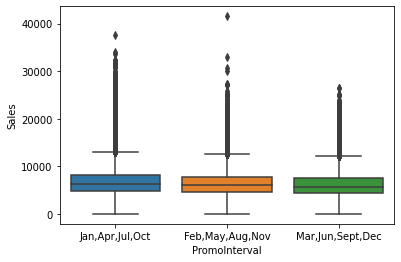

day


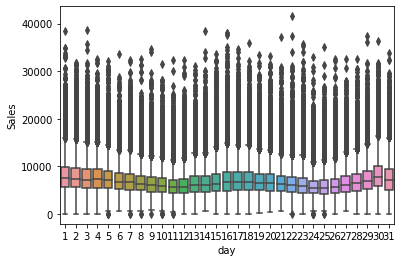

month


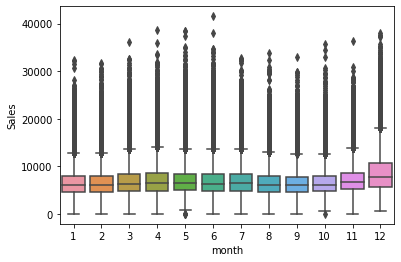

interval_month


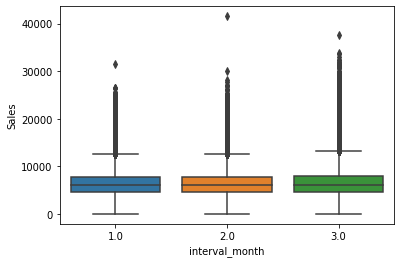

In [ ]:
for i in categorical:
  print(i)
  sns.boxplot(y='Sales',x=i,data=train)
  plt.show()

In [ ]:
numeric+['aaa']

['Sales',
 'Customers',
 'CompetitionDistance',
 'days_competitve',
 'days_promo2',
 'aaa']

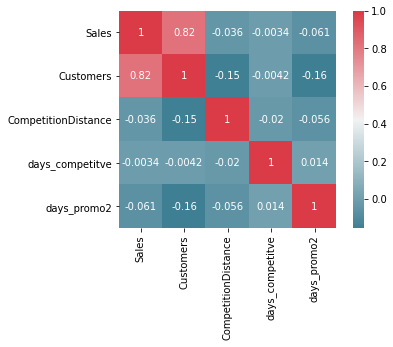

In [ ]:
corr=train.loc[:,numeric+['month']].corr()
sns.heatmap(corr,annot =True, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

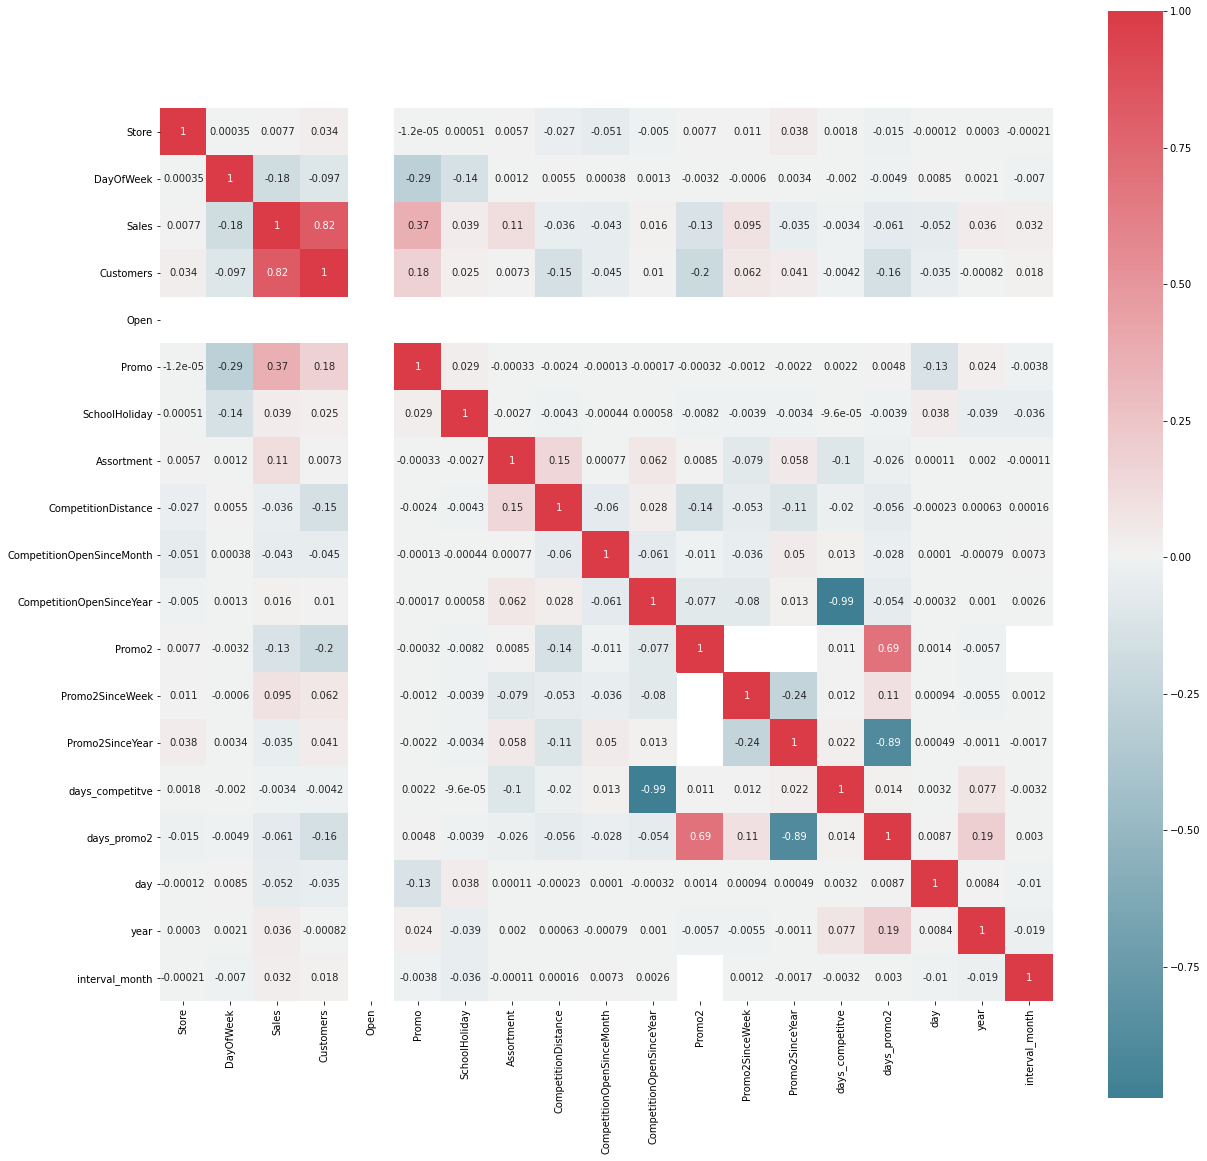

In [ ]:
plt.subplots(figsize=(20,20))
corr=train.corr()
sns.heatmap(corr,annot =True, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [ ]:
                       data2=train.groupby(['year','month','StoreType'])['Sales'].agg(['sum','mean'])
data2.reset_index(inplace=True) 
data2

,year,month,StoreType,sum,mean
0,2013,1,a,98821318,6336.730875
1,2013,1,b,4124131,8609.876827
2,2013,1,c,23705553,6266.337034
3,2013,1,d,53481205,5934.443520
4,2013,2,a,93685217,6499.598793
...,...,...,...,...,...
119,2015,6,d,64263846,7301.880014
120,2015,7,a,112489626,6919.457834
121,2015,7,b,5731086,10874.925996
122,2015,7,c,27832341,6965.050300


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


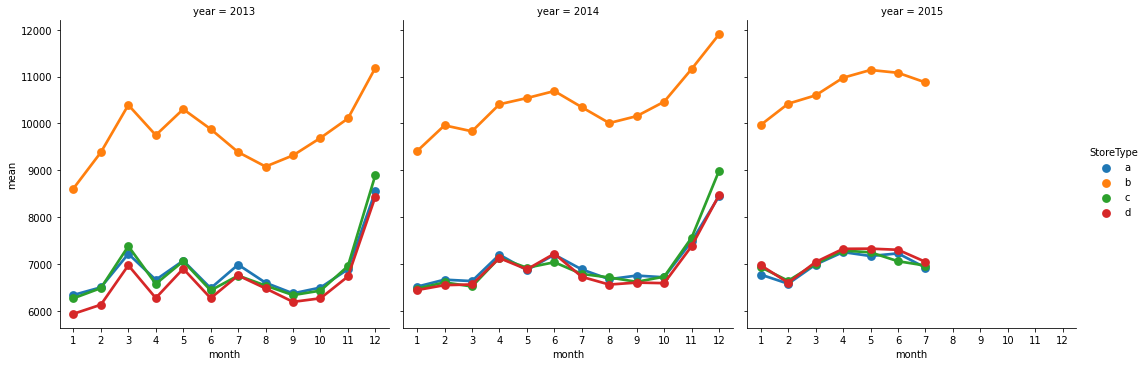

In [ ]:
sns.factorplot(x='month',y='mean',hue='StoreType',col='year',data=data2)

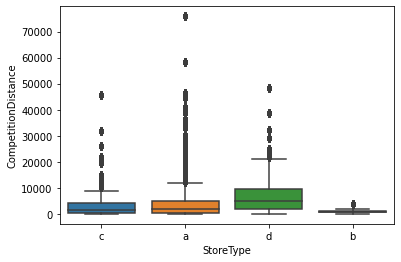

In [ ]:
sns.boxplot(y='CompetitionDistance',x='StoreType',data=train)

In [ ]:
sns.barplot(y='CompetitionDistance',x='StoreType',data=train)

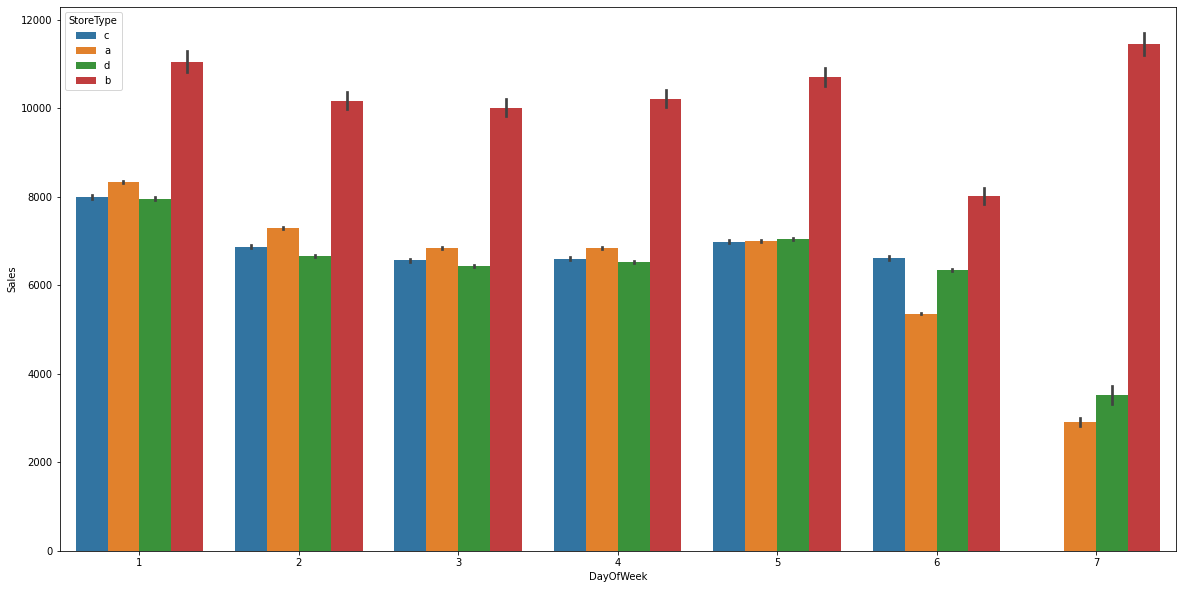

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(x='DayOfWeek',y='Sales',data=train,hue='StoreType',estimator=np.mean)

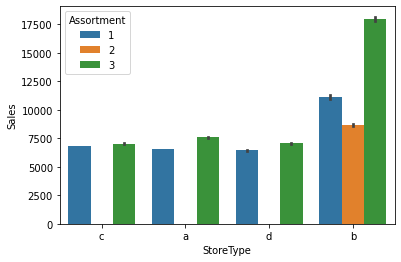

In [ ]:
sns.barplot(x='StoreType',y='Sales',data=train,hue='Assortment',estimator=np.mean)

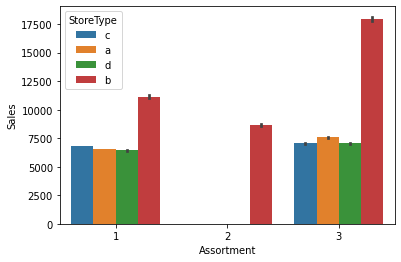

In [ ]:
sns.barplot(x='Assortment',y='Sales',data=train,hue='StoreType')

In [ ]:
train.to_csv('train_3.csv',index=False)

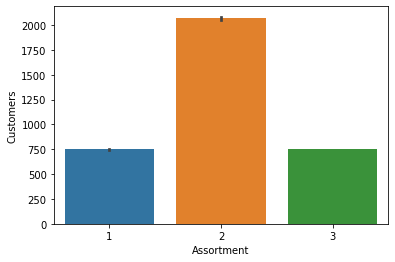

In [ ]:
sns.barplot(x='Assortment',y='Customers',data=train,estimator=np.mean)

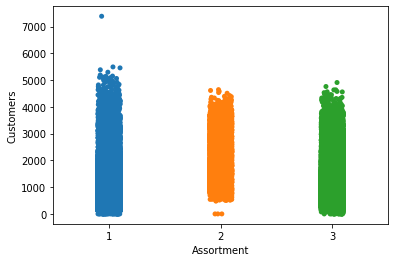

In [ ]:
sns.stripplot(x="Assortment", y="Customers", data=train)

In [ ]:
!git config — global user.email 'nomic.16@gmail.com'
!git config — global user.name 'nicolasmontano'

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 